In [1]:
import numpy as np
import pandas as pd
import networkx as nx
#import json
#import os
import page_ranker as pr
#import import_graph as ig
import inspect_subgraph as isg

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N=19

In [3]:
star = nx.star_graph(N)
G = nx.MultiDiGraph()
for e in star.edges:
    G.add_edge(e[1],e[0])

nx.set_node_attributes(G,'vanilla', 'type')
nx.set_edge_attributes(G,'vanilla', 'type')

In [4]:
G.nodes[0]

{'type': 'vanilla'}

In [5]:
G.edges[(1,0,0)]

{'type': 'vanilla'}

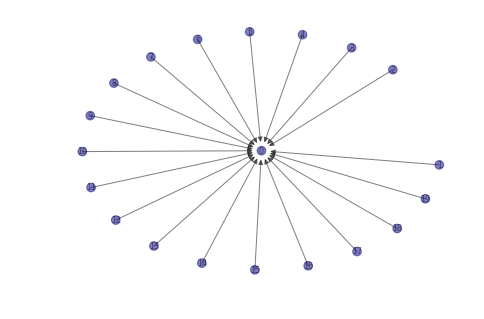

In [6]:
isg.inspectSubGraph(G, G.nodes, expand=False, verbose=False, label=True,pos = "kk")

In [7]:
alpha = .1
iterations = 50

seed = {n:1/len(G.nodes) for n in G.nodes}
#seed = {n:0 for n in G.nodes}
#seed[0] =1

node_wt_by_type = {'vanilla': 1}
edge_wt_by_type = {'vanilla': (1,1/2)}

self_loop_wt= 1

In [8]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=True,
                         self_loop_wt=self_loop_wt, 
                         node_wt_by_type =node_wt_by_type,
                         edge_wt_by_type=edge_wt_by_type)

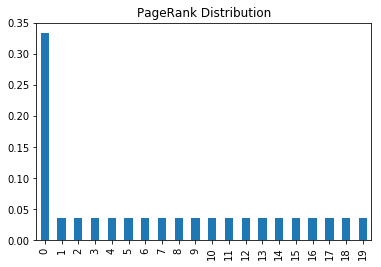

In [9]:
df.tail(1).T.plot(kind='bar',legend=False, title='PageRank Distribution')

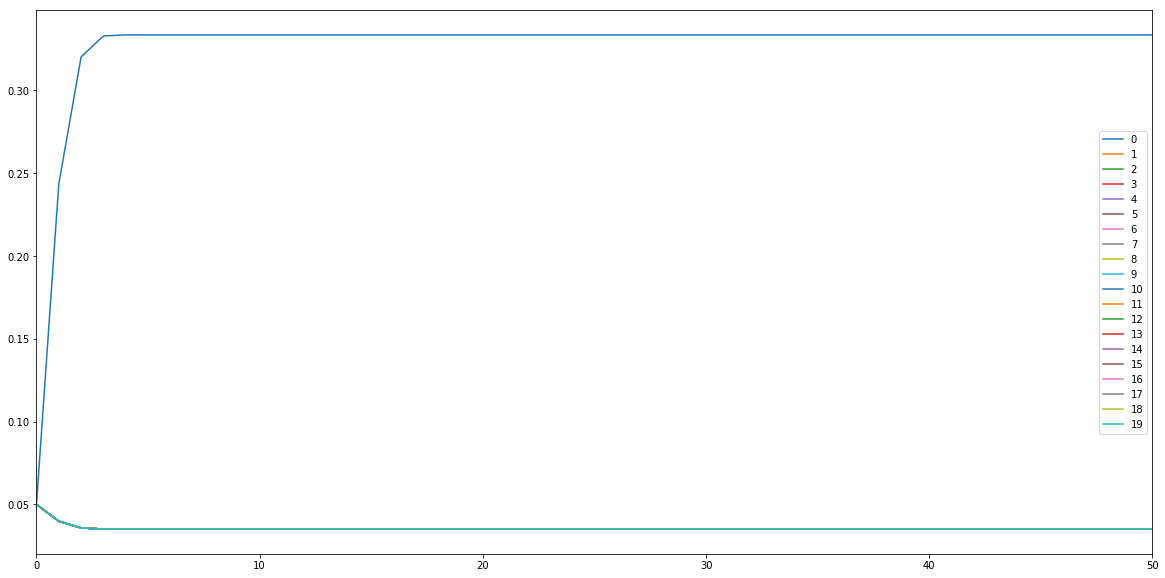

In [10]:
df.plot( figsize=(20,10))

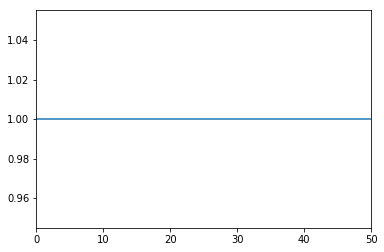

In [11]:
df.sum(axis=1).plot()

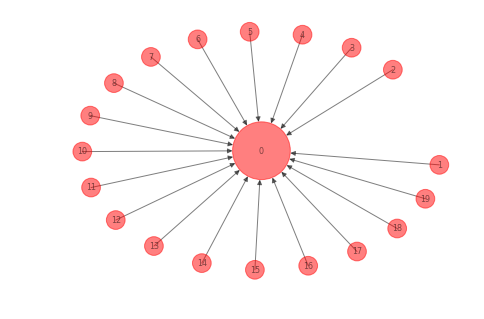

In [12]:
ns = [10000*G.nodes[n]['score'] for n in G.nodes]
nl = {n:n for n in G.nodes}

nx.draw_kamada_kawai(G, node_size=ns, labels=nl, font_size=8, alpha=.5)

In [13]:
nx.get_node_attributes(G,'self_wt')

{1: 1,
 0: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1}

In [14]:
nx.get_edge_attributes(G,'out_weight')

{(1, 0, 0): 0.5,
 (2, 0, 0): 0.5,
 (3, 0, 0): 0.5,
 (4, 0, 0): 0.5,
 (5, 0, 0): 0.5,
 (6, 0, 0): 0.5,
 (7, 0, 0): 0.5,
 (8, 0, 0): 0.5,
 (9, 0, 0): 0.5,
 (10, 0, 0): 0.5,
 (11, 0, 0): 0.5,
 (12, 0, 0): 0.5,
 (13, 0, 0): 0.5,
 (14, 0, 0): 0.5,
 (15, 0, 0): 0.5,
 (16, 0, 0): 0.5,
 (17, 0, 0): 0.5,
 (18, 0, 0): 0.5,
 (19, 0, 0): 0.5}

In [15]:
nx.get_edge_attributes(G,'in_weight')

{(1, 0, 0): 1,
 (2, 0, 0): 1,
 (3, 0, 0): 1,
 (4, 0, 0): 1,
 (5, 0, 0): 1,
 (6, 0, 0): 1,
 (7, 0, 0): 1,
 (8, 0, 0): 1,
 (9, 0, 0): 1,
 (10, 0, 0): 1,
 (11, 0, 0): 1,
 (12, 0, 0): 1,
 (13, 0, 0): 1,
 (14, 0, 0): 1,
 (15, 0, 0): 1,
 (16, 0, 0): 1,
 (17, 0, 0): 1,
 (18, 0, 0): 1,
 (19, 0, 0): 1}

In [16]:
nx.get_node_attributes(G,'total_wt')

{1: 2,
 0: 10.5,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2}

In [17]:
alphas = [.1,.03,.01,.003,.001]

R= np.zeros((len(alphas),N+1))
i=0
for a in alphas:
    r, __, g = pr.pageRanker(G,
                             a,
                             iterations,
                             seed=seed,
                             initial_value = seed,
                             lazy=True,
                             lazy_decay = True,
                             self_loop_wt=self_loop_wt, 
                             node_wt_by_type =node_wt_by_type,
                             edge_wt_by_type=edge_wt_by_type)

    R[i,:] = r
    i=i+1


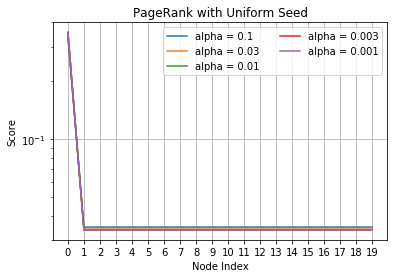

In [20]:
x= [n for n in range(N+1)]
plt.semilogy(x,R.T)
plt.legend(['alpha = '+str(a) for a in alphas],loc='upper right',ncol=2)
plt.title('PageRank with Uniform Seed')
plt.ylabel('Score')
plt.xlabel('Node Index')
ax = plt.axes()
ax.set_xticks(x)
ax.grid()

In [19]:
R.T

array([[0.33350785, 0.34934177, 0.35374809, 0.35527829, 0.35571436],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.03401326, 0.03393272, 0.03390977],
       [0.03507853, 0.03424517, 0.